## Image Classification With Deep Learning

## Image Classification using Convolutional Neural Network (CNN)

### What is CNN?
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign learnable weights and biases to various aspects/objects in the image and be able to differentiate one from the other.

The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

#####  

### What is Image?

Images are nothing but the combination of some different value between 0-255 with 4 different layers i.e RGBA.

R - Red. (0-255) <br>
G - Green. (0-255) <br>
B - Blue. (0-255) <br>
A - Alpha. (0-255) <br>

Images are create by above different layers with there different values from 0-255.<br>

RGB are the 3 different layers which will generate the a single color by combining the all 3 value.<br>
<br><b>e.g : if we have all max value(255) , we will get white color similarly if we have all min value (0) we will have black color.</b><br><br>
<b>Colors combination</b><br>RGB(255, 255, 255) => White<br>RGB(0, 0, 0) => Black<br>
<br>

<h3>What is Alpha?</h3><br>
Alpha is the value which is used to define the opacity and transparency of an image.

####   

### How CNN works?
A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization. See the respective tutorials on convolution and pooling for more details on those specific operations.

#####   

### Architecture
A CNN consists of a number of convolutional and subsampling layers optionally followed by fully connected layers. The input to a convolutional layer is a m x m x r image where m is the height and width of the image and r is the number of channels, e.g. an RGB image has r=3. The convolutional layer will have k filters (or kernels) of size n x n x q where n is smaller than the dimension of the image and q can either be the same as the number of channels r or smaller and may vary for each kernel. The size of the filters gives rise to the locally connected structure which are each convolved with the image to produce k feature maps of size m−n+1. Each map is then subsampled typically with mean or max pooling over p x p contiguous regions where p ranges between 2 for small images (e.g. MNIST) and is usually not more than 5 for larger inputs. Either before or after the subsampling layer an additive bias and sigmoidal nonlinearity is applied to each feature map. The figure below illustrates a full layer in a CNN consisting of convolutional and subsampling sublayers. Units of the same color have tied weights.

### <img src="Cnn_layer.png">

### Layers used to build ConvNets
As we described above, a simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

### Overview
We will go into more details below, but a simple ConvNet for CIFAR-10 classification could have the architecture [INPUT - CONV - RELU - POOL - FC]. In more detail:<br>
<br>
<b>1 INPUT [32x32x3]</b> will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.<br><br>
<b>2 CONV layer</b> will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.<br><br>
<b>3 RELU layer</b> will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).<br><br>
<b>4 POOL layer</b> will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].<br><br>
<b>5 Fully-connected layer</b> will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.<br><br>

### Architecture layout with RELU, POOLING, FULLY-CONNECTED 

### <img src="cnn_arch-1.png">

####   

## Coding stuff 

### Importing library  

In [1]:
from fastai.vision import *

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = Path('drive/My Drive/Deep Learning/Selfie/');path
path = Path('C:\\Users\\Mithlesh.kumar\\Desktop\\Notebook\\Selfie');path

WindowsPath('C:/Users/Mithlesh.kumar/Desktop/Notebook/Selfie')

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'models',
 'MoreData',
 'Selfie',
 'Selfie On Bike',
 'selfie.csv',
 'Selfie.ipynb']

### Getting trainging data from current folder
<br><b>path -> Current path</b>
<br><b>train -> training folder i.e current folder</b>
<br><b>ds_tfms -> using get_transforms function to apply some data augmentation (Using the same image in different way just like flip the image , zoom the image, rotate the image etc) so that our model will more accurate.</b>
<br><b>bs -> batch size i.e 10 (you can adjust it according to your need).</b>
<br><b>size -> setting the image size to 224.</b>

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(),bs=10 ,size=224, num_workers=4)
                                  .normalize(imagenet_stats)

#### Checking the class or target or output value 

In [5]:
data.classes

['Selfie', 'Selfie On Bike']

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Selfie', 'Selfie On Bike'], 2, 516, 129)

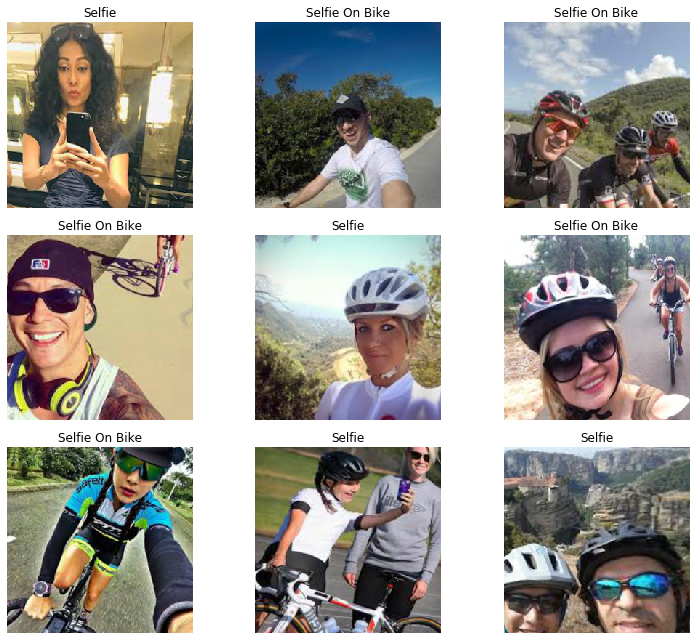

In [7]:
data.show_batch(rows=3, figsize=(11,9))

###   

### Creating Learner

In [7]:
learner = cnn_learner(data, models.resnet50, metrics=accuracy)

In [21]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


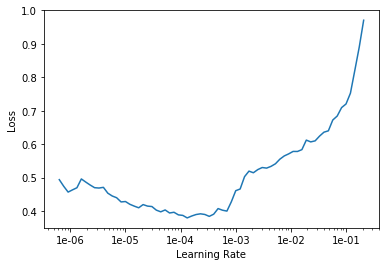

In [22]:
learner.recorder.plot()

####   

### Training our model on above dataset
where <b>10</b> is the number of <b>epochs and lr(learning rate)</b> is between 6e-05-2e-04/100. 

In [23]:
learner.fit_one_cycle(10, max_lr=slice(6e-05, 2e-04/100))

epoch,train_loss,valid_loss,accuracy,time
0,0.378404,0.472446,0.811966,00:16
1,0.383142,0.518442,0.786325,00:17
2,0.383471,0.449966,0.846154,00:17
3,0.354673,0.514899,0.786325,00:17
4,0.348796,0.527933,0.811966,00:17
5,0.303510,0.465299,0.820513,00:17
6,0.328380,0.461824,0.837607,00:17
7,0.307759,0.479870,0.837607,00:17
8,0.295653,0.469365,0.820513,00:17
9,0.255280,0.489760,0.829060,00:17


### Loading trained Model 

In [0]:
learner = learner.load('Selfie256')

####   

### Unfreeze
unfreezing will allow us to traing our whole model aging with the update weight and bias so that we will get better accuracy.

In [0]:
learner.unfreeze()

In [137]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


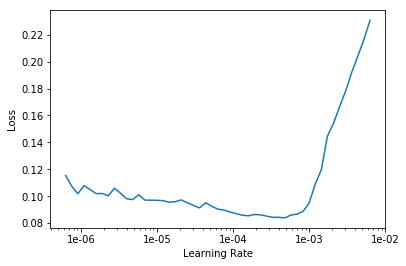

In [138]:
learner.recorder.plot()

In [139]:
learner.fit_one_cycle(10, max_lr=slice(2e-04, 7e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.063243,0.111560,0.954955,00:18
1,0.075809,0.139112,0.963964,00:19
2,0.076184,0.221274,0.936937,00:18
3,0.087274,0.757943,0.837838,00:17
4,0.112280,0.530515,0.891892,00:19
5,0.114571,0.570930,0.846847,00:17
6,0.120446,0.436220,0.900901,00:17
7,0.115945,0.284778,0.927928,00:18
8,0.116210,0.279014,0.909910,00:17
9,0.113938,0.268117,0.918919,00:18


In [142]:
learner.fit(2, lr=slice(2e-06, 7e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.073727,0.246368,0.936937,00:17
1,0.082164,0.232172,0.936937,00:19


###   

### Architecture details 

In [148]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
___________________________________________________

In [152]:
learner.fit(5, lr=1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.122018,0.411408,0.909910,00:18
1,0.131556,0.411869,0.900901,00:17
2,0.124098,0.418284,0.900901,00:19
3,0.117485,0.417477,0.909910,00:18
4,0.113631,0.407060,0.909910,00:19


In [0]:
# learner.save('Selfie_256_94')

In [14]:
interpt = ClassificationInterpretation.from_learner(learner)

###   

### Checking examples which has maximum loss

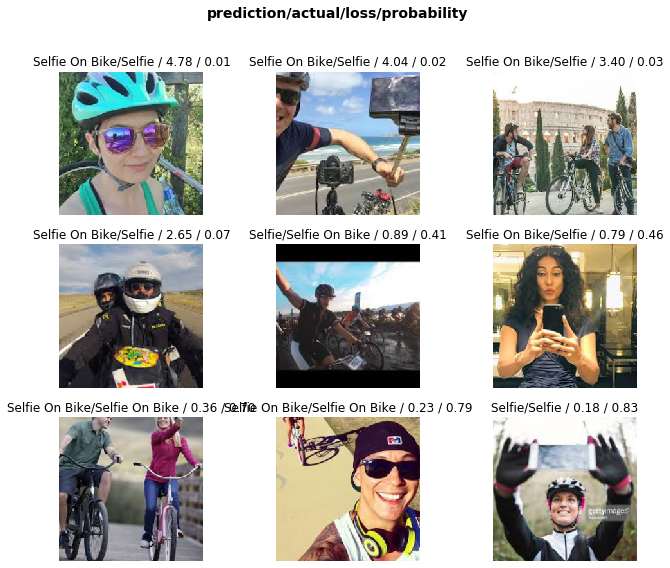

In [15]:
interpt.plot_top_losses(9, figsize=(11,9))

### Confusion Matrix

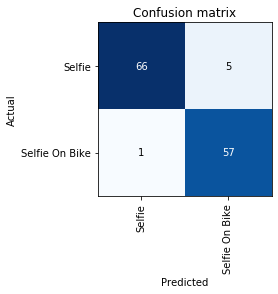

In [16]:
interpt.plot_confusion_matrix()

In [8]:
learner = learner.load('Selfie_95_Max')

### Loading an image to predict it 

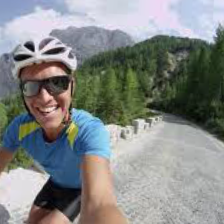

In [28]:
img = learner.data.train_ds[68][0];img

###   

### Prediction

In [29]:
learner.predict(img)

(Category Selfie On Bike, tensor(1), tensor([1.8333e-04, 9.9982e-01]))

### Loss Function 

In [25]:
learner.loss_func

FlattenedLoss of CrossEntropyLoss()